In [1]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
import seaborn
import swasputils

In [2]:
subjects = swasputils.AggregatedClassifications()

In [3]:
subjects.df = subjects.df[['SWASP ID', 'Classification Count']].fillna(0)

In [4]:
coords = SkyCoord(subjects.df['SWASP ID'].replace(r'^1SWASP', '', regex=True).values, unit=(u.hour, u.deg))

<AxesSubplot:>

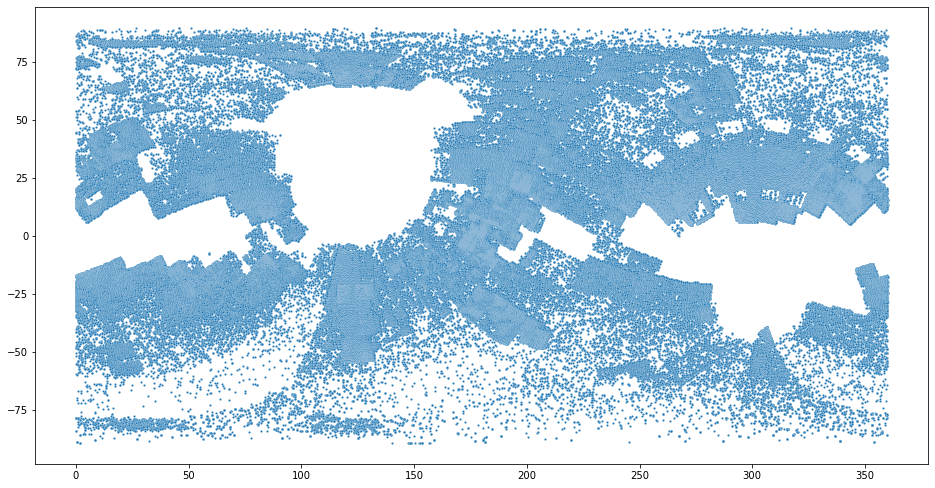

In [5]:
plt.figure(figsize=(16,8.4))
seaborn.scatterplot(x=coords.galactic.l, y=coords.galactic.b, s=5)

In [5]:
ra_rad = coords.ra.wrap_at(180 * u.deg).radian
dec_rad = coords.dec.radian

In [6]:
color_map = plt.cm.Spectral_r

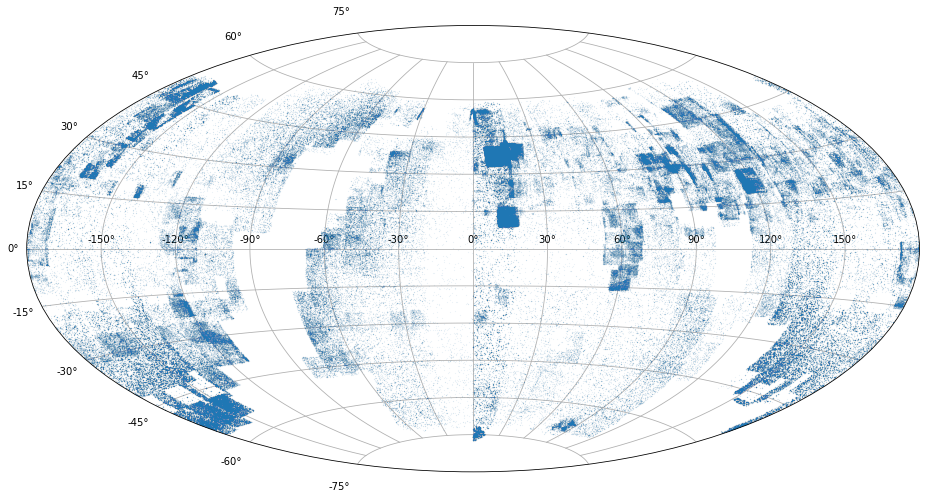

In [7]:
plt.figure(figsize=(16,8.4))
plt.subplot(111, projection="aitoff")
#plt.title('All SuperWASP Classifications')
plt.grid(True)
plt.plot(
    ra_rad, dec_rad, 'o', markersize=0.1, alpha=0.3
)
plt.subplots_adjust(top=0.95, bottom=0.0)
plt.show()

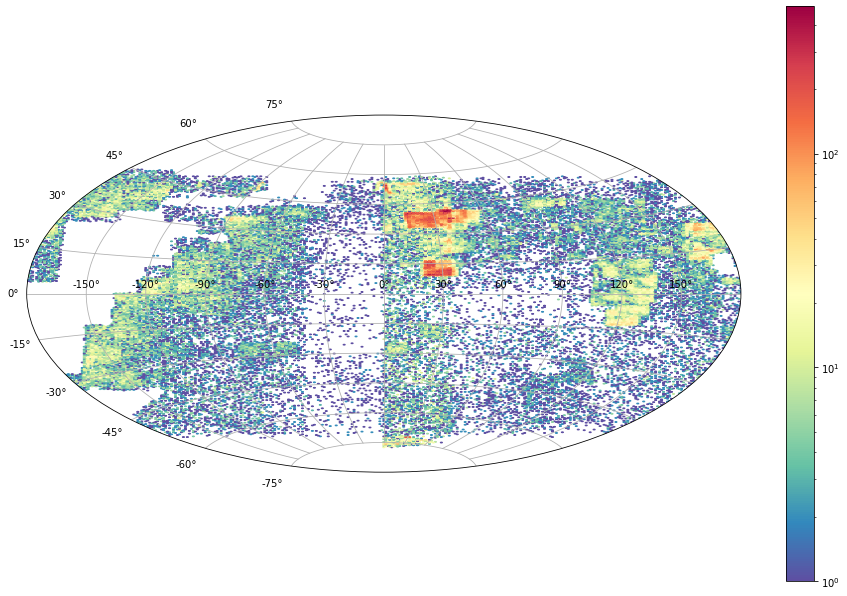

In [8]:
plt.figure(figsize=(16,8.4))
plt.subplot(111, projection="aitoff")
#plt.title('All SuperWASP Classifications')
plt.grid(True)
plt.hexbin(
    ra_rad, dec_rad,
    cmap=color_map, gridsize=360, mincnt=1, bins='log',
)
plt.colorbar()
plt.subplots_adjust(top=0.95, bottom=0.0)
plt.show()

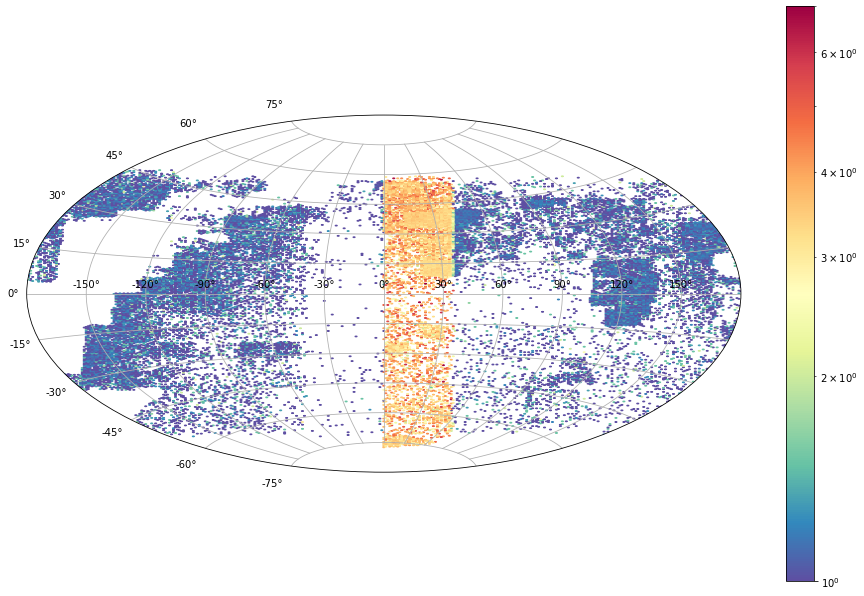

In [9]:
plt.figure(figsize=(16,8.4))
plt.subplot(111, projection="aitoff")
#plt.title('All SuperWASP Classifications')
plt.grid(True)
plt.hexbin(
    ra_rad, dec_rad,
    C=subjects.df['Classification Count'], 
    cmap=color_map, gridsize=360, mincnt=1, bins='log',
)
plt.colorbar()
plt.subplots_adjust(top=0.95, bottom=0.0)
plt.show()